#Основные понятия:
1. **Обучение с учителем** – это тип машинного обучения, при котором модель обучается на размеченных данных.
  - Размеченные данные состоят из признаков (features) и целевой переменной (target), которую модель должна предсказывать.

2. **Регрессия** – это задача предсказания непрерывной переменной на основе входных признаков.
  - Цель регрессии состоит в том, чтобы построить модель, которая может определить математическую зависимость между признаками и целевой переменной.

3. **Scikit-learn** – это популярная библиотека машинного обучения для Python, содержащая реализации множества алгоритмов обучения, включая регрессию.
  - Scikit-learn предоставляет простой и эффективный способ построения, обучения и оценки моделей машинного обучения.

4. **Линейная регрессия** – это простой и популярный метод регрессии, основанный на предположении о линейной зависимости между признаками и целевой переменной.
  - В линейной регрессии предполагается, что целевая переменная может быть аппроксимирована линейной комбинацией входных признаков.
  - Цель линейной регрессии состоит в поиске линейной функции, которая наилучшим образом приближает зависимость между признаками и целевой переменной.

5. Для оценки качества модели регрессии используются различные метрики, такие как **среднеквадратичная ошибка** (Mean Squared Error, MSE),**коэффициент детерминации** (R^2) и др.
  - Хорошая модель регрессии должна давать точные и стабильные предсказания на новых данных.



Цель этого анализа - изучить множество факторов и их сложные взаимосвязи с целью точного прогнозирования заработной платы в сфере науки о данных


Анализ данных прогнозирования заработной платы в сфере DataScience:
   - Загрузите датасет ds_salaries
   - Исследуйте данные, чтобы понять их структуру и особенности. Определите типы данных каждой переменной (категориальные или числовые). Проведите описательный анализ целевой переменной "salary".


### Загрузка библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###Первичный анализ

In [ ]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


3755 объектов, 11 признаков. Описание признаков:

`work_year` [categorical] : Это конкретный год, в котором была выплачена заработная плата. В разные годы могут быть разные экономические условия, которые могут повлиять на уровень заработной платы.

`experience_level` [categorical] : уровень опыта, который человек имеет на конкретной работе. Это является ключевым фактором при расчете заработной платы, поскольку, как правило, более опытные сотрудники получают более высокую зарплату благодаря своим передовым навыкам и знаниям.

`employment_type` [categorical] : Характер трудового договора, например, полный рабочий день, неполный рабочий день или по контракту, может существенно влиять на заработную плату. Сотрудники, работающие полный рабочий день, часто получают более высокую годовую заработную плату по сравнению со своими коллегами, работающими неполный рабочий день или по контракту.

`job_title` [categorical] : Должность, которую человек занимает в компании. Разные должности имеют разную шкалу заработной платы в зависимости от требуемых обязанностей и навыков. Например, на руководящих должностях обычно платят больше, чем на должностях начального уровня.

`salary` [numerical] : общая сумма заработной платы, выплачиваемой сотруднику. На это напрямую влияют такие факторы, как уровень опыта, название должности и тип занятости.

`salary_currency` [categorical] : Конкретная валюта, в которой выплачивается заработная плата, обозначаемая кодом ISO 4217. Обменные курсы могут влиять на величину заработной платы при пересчете в разные валюты.

`salaryinusd` [numerical] :  общая сумма заработной платы брутто, пересчитанная в доллары США. Это позволяет проводить единообразное сравнение заработной платы в разных странах и валютах.


`employee_residence` [categorical]: Основная страна проживания сотрудника, обозначаемая кодом ISO 3166. Стоимость жизни и преобладающие ставки заработной платы в стране проживания сотрудника могут влиять на уровень заработной платы.

`remote_ratio` [ratio]: доля работы, выполняемой удаленно. С ростом удаленной работы компании могут корректировать заработную плату в зависимости от стоимости жизни в месте нахождения сотрудника и доли удаленной работы.

`company_location` [categorical]: местоположение главного офиса работодателя или филиала, с которым заключен контракт. Компании в разных регионах могут предлагать разные уровни заработной платы из-за различных экономических условий и стоимости жизни.

`company_size` [categorical]:  Среднее число сотрудников в компании в течение рабочего года. Крупные компании часто имеют структурированную шкалу заработной платы и могут предлагать более высокие оклады за счет эффекта масштаба и увеличения доходов.



In [ ]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1171, 11)


In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


Выберем численные признаки:

In [ ]:
df_numeric = df.select_dtypes(include='number')
df_numeric

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100
...,...,...,...,...
3750,2020,412000,412000,100
3751,2021,151000,151000,100
3752,2020,105000,105000,100
3753,2020,100000,100000,100


Выберем категориальные признаки:

In [ ]:
df_categorical = df.select_dtypes(include='object')
df_categorical

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M
...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USD,US,US,L
3751,MI,FT,Principal Data Scientist,USD,US,US,L
3752,EN,FT,Data Scientist,USD,US,US,S
3753,EN,CT,Business Data Analyst,USD,US,US,L


Сделаем выборку из признаков, содержащих в названии `salary`



In [ ]:
salary_features = ['salary', 'salary_currency', 'salary_in_usd']
df[salary_features]

,salary,salary_currency,salary_in_usd
0,80000,EUR,85847
1,30000,USD,30000
2,25500,USD,25500
3,175000,USD,175000
4,120000,USD,120000
...,...,...,...
3750,412000,USD,412000
3751,151000,USD,151000
3752,105000,USD,105000
3753,100000,USD,100000


###Статистические характеристики признаков

Рассмотрим статистические характеристики количественных переменных

In [ ]:
df_numeric.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Данные охватывают период с 2020 по 2023 годы.  Средняя зарплата, пересчитанная в доллары США (`salary_in_usd`), составляет приблизительно 137570 долларов, что соответствует типичным зарплатам высокооплачиваемых специалистов.

Столбец `remote_ratio` показывает долю удалённой работы, и его значения варьируются от 0 до 100. Максимальное значение в 100 может указывать на полностью удаленную работу. В среднем (`mean`) этот показатель равен примерно 46, что может указывать на смешанный характер работы (частично удаленная, частично офисная).

Рассмотрим статистические характеристики категориальных переменных

In [ ]:
df_categorical.describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


1. experience_level: Уровень опыта имеет 4 уникальных значения, и большинство (2516 из 3755) записей относятся к категории "SE", что может означать "Senior Expert"

2. employment_type: Вид занятости также имеет 4 уникальных значения, наиболее частым из которых является "FT" (3718 из 3755), что обозначает "Full-Time" или полную занятость.

3. job_title: Наименование должности содержит 93 уникальных значения, и наиболее часто встречающаяся должность - это "Data Engineer" (1040 записей).

4. employee_residence: Страна проживания сотрудника представлена 78 уникальными значениями, преимущественное большинство сотрудников проживают в США (3004 записи).

6. company_location: Местонахождение компании также чаще всего в США (3040 из 3755 записей).

7. company_size: Размер компании имеет всего 3 уникальных значения и наиболее часто встречаемый размер - "M" (3153 записи), что обозначает "Medium" или средний размер компании.


*Дополнительно*   
Чтобы точно сравнить зарплаты за разные годы, важно учитывать инфляцию. Инфляция - это скорость, с которой общий уровень цен на товары и услуги увеличивается с течением времени. Приведя зарплаты в соответствие с общей валютой и годом, мы можем провести значимые сравнения между ними.  

Чтобы привести зарплаты за разные годы к их текущему значению для целей сравнения. Мы будем использовать набор данных, содержащий информацию о зарплатах сотрудников, годах работы и валюте.

**Определить уровень инфляции** для Соединенных Штатов (USA) и мировых рынков. Эти показатели будут использоваться для корректировки заработной платы в зависимости от года и валюты.

In [ ]:
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}


def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary




df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,adjusted_salary
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,85847.0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,30000.0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,25500.0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,175000.0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,120000.0


###2
 - Проведите одномерный анализ признаков, используйте визуализацию
 - Проведите анализ взаимодействия признаков, используйте визуализацию
 - *Дополнительно* проведите геопространственный анализ и сделайте выводы по результатам


Рассмотрим признак `job_title`


In [ ]:
df.job_title.value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [ ]:
def assign_broader_category(job_title):
    category_mapping = {
        "Data Engineering": ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"],
        "Data Science": ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"],
        "Machine Learning": ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"],
        "Data Architecture": ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"],
        "Management": ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    }

    for category, job_titles in category_mapping.items():
        if job_title in job_titles:
            return category

    return "Other"


In [ ]:
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [ ]:
df['job_category'].value_counts()

job_category
Data Engineering     1813
Data Science          985
Other                 421
Machine Learning      327
Data Architecture     105
Management            104
Name: count, dtype: int64

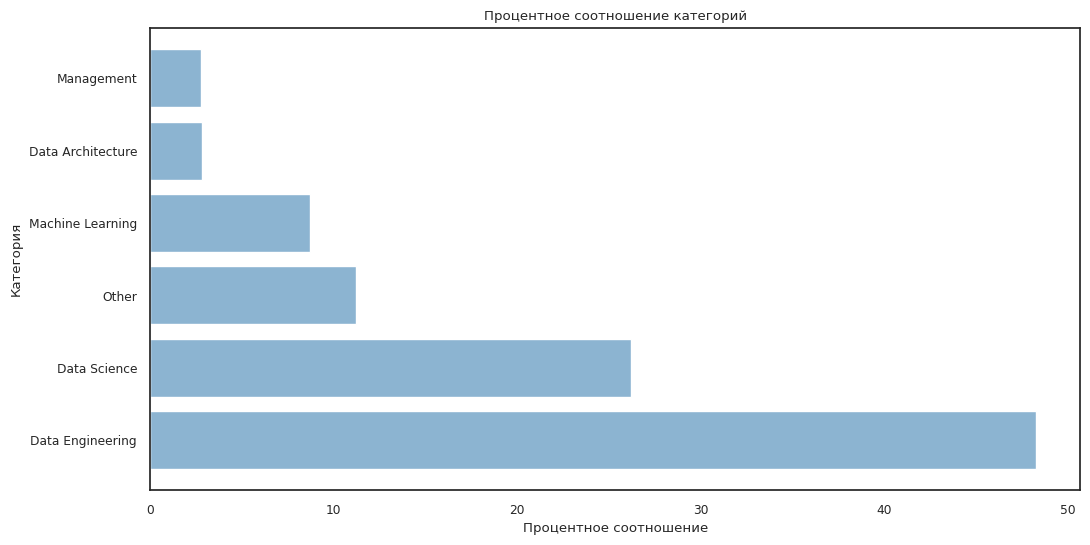

In [ ]:
value_counts = df['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Процентное соотношение')
ax.set_ylabel('Категория')
ax.set_title('Процентное соотношение категорий')
plt.show()

- Категория "Data Engineering" имеет самую большую долю, с процентом близким к 50%.
- "Data Science" следует за ней с процентом, кажется, около 25%.
- Категория "Other" представлена примерно 15%.
- "Machine Learning" составляет чуть меньше 10%.
- "Data Architecture" и "Management" занимают наименьший процент, обе категории находятся ниже 5%.

Распределение по различным типам занятости

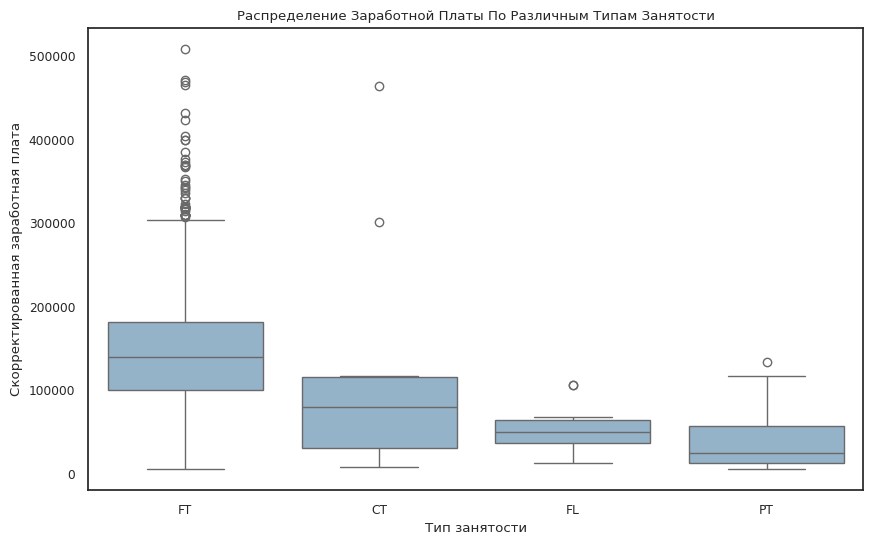

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='adjusted_salary')
plt.title('Распределение Заработной Платы По Различным Типам Занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Скорректированная заработная плата')
plt.show()

1. **FT (Полный рабочий день)**:
   - Медиана заработной платы находится ближе к нижней части ящика, что указывает на то, что более 50% работников зарабатывают меньше средней заработной платы.
   - Распределение является асимметричным с правосторонней асимметрией, поскольку усы и выбросы (отдельные точки) простираются довольно высоко, что указывает на наличие значительного числа работников с зарплатой выше медианы.
   - Существует множество выбросов, показывающих индивидуальные случаи с исключительно высокими зарплатами по сравнению с основной массой данных.

2. **CT (Контракт)**:
   - Медиана находится ближе к середине бокса, что указывает на более симметричное распределение заработной платы среди работников по контракту.
   - Распределение имеет меньше выбросов, чем в категории FT.

3. **FL (Фриланс)**:
   - Медианная зарплата ниже, чем в предыдущих категориях, и расположена в верхней части ящика.
   - Диапазон (размах) зарплат в этой категории относительно узкий, и есть очень мало выбросов.

4. **PT (Частичная занятость)**:
   - Медианная зарплата самая низкая среди всех категорий.
   - Ящик относительно узкий, что указывает на меньшее разнообразие в зарплатах.
   - Есть один выброс, показывающий зарплату, которая значительно превышает типичные значения для данной категории.

adjusted_salary: mu = 142445.66, sigma = 64692.98
adjusted_salary: Skewness: 0.58
adjusted_salary: Kurtosis: 1.14


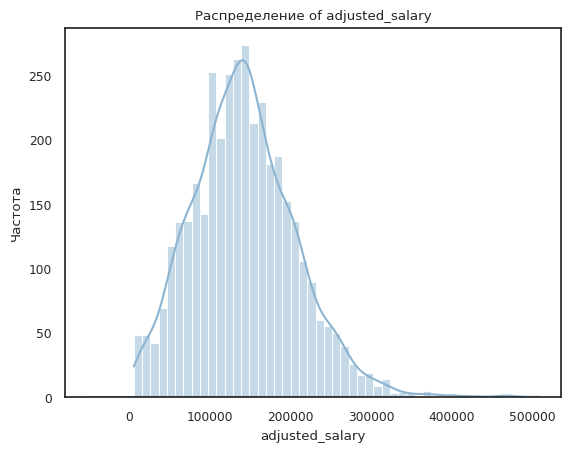

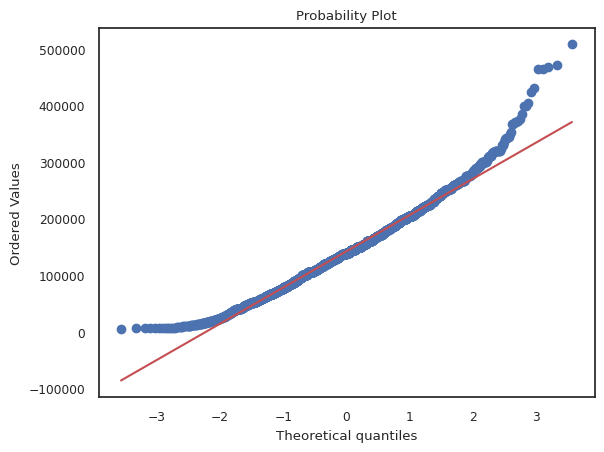

In [ ]:
columns = ['adjusted_salary']

for col in columns:

    sns.histplot(df[col], kde=True)

    (mu, sigma) = stats.norm.fit(df[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    print('{}: Skewness: {:.2f}'.format(col, df[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, df[col].kurt()))

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.title('Распределение of {}'.format(col))

    fig = plt.figure()
    stats.probplot(df[col], plot=plt)

    plt.show()

Распределение имеет положительное асимметричное смещение (Skewness = 0.54), что указывает на то, что более тяжёлый "хвост" распределения находится справа. Кроме того, эксцесс (Kurtosis = 0.83) немного выше, чем для нормального распределения, что указывает на более острые пики и тяжелые хвосты распределения. Среднее значение (mu) заработной платы составляет примерно 137 579.39 долларов США, со стандартным отклонением (sigma) около 63 047.23 долларов США.

вероятностный график (Probability Plot), на котором синими точками показаны отсортированные значения заработной платы по их теоретическим квантилям. Красная линия представляет собой линию, которую можно было бы ожидать, если бы данные имели идеальное нормальное распределение. График показывает, что данные отклоняются от нормального распределения, особенно в его хвостах (обе стороны графика поднимаются выше и опускаются ниже красной линии), что указывает на наличие выбросов или тяжёлых хвостов.

Многомерный анализ

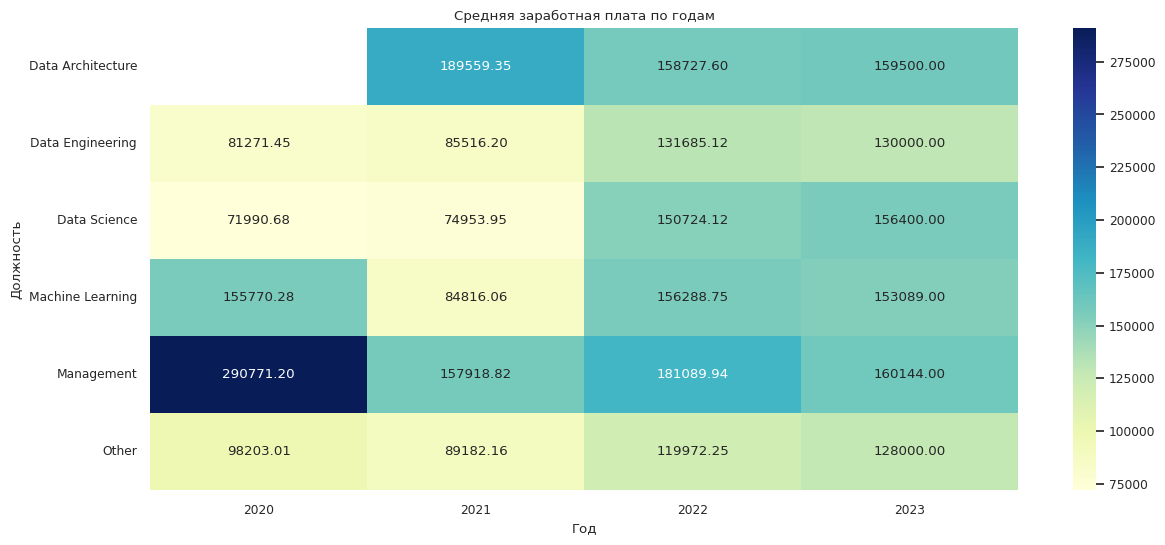

In [ ]:
pivot_table = df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Средняя заработная плата по годам')
plt.xlabel('Год')
plt.ylabel('Должность')
plt.show()

Зарплаты в Management категории находятся на самом высоком уровне по сравнению с другими представленными специальностями. Они начинаются от порядка 257,600 в 2020 году и слегка снижаются до 160,144 в 2023 году.

1. Различия в остальных категориях менее значительны, однако каждая из них показывает рост медианной зарплаты с течением времени. Например, в Data Engineering зарплаты возросли с 72,000 в 2020 году до 130,000 в 2023 году.

2. В категории Machine Learning наблюдается рост с 138,000 в 2020 году до 153,089 в 2023 году.

3. В категории Data Science также виден постепенный рост: начиная от 62,726 в 2020 году и достигнув 156,400 в 2023 году.

4. Data Architecture и Other показывают стабильный рост медианной зарплаты с каждым годом, хотя они начинают и заканчивают период с самых низких показателей среди представленных групп.


Сравнение заработной платы между местом жительства сотрудника и местонахождением компании

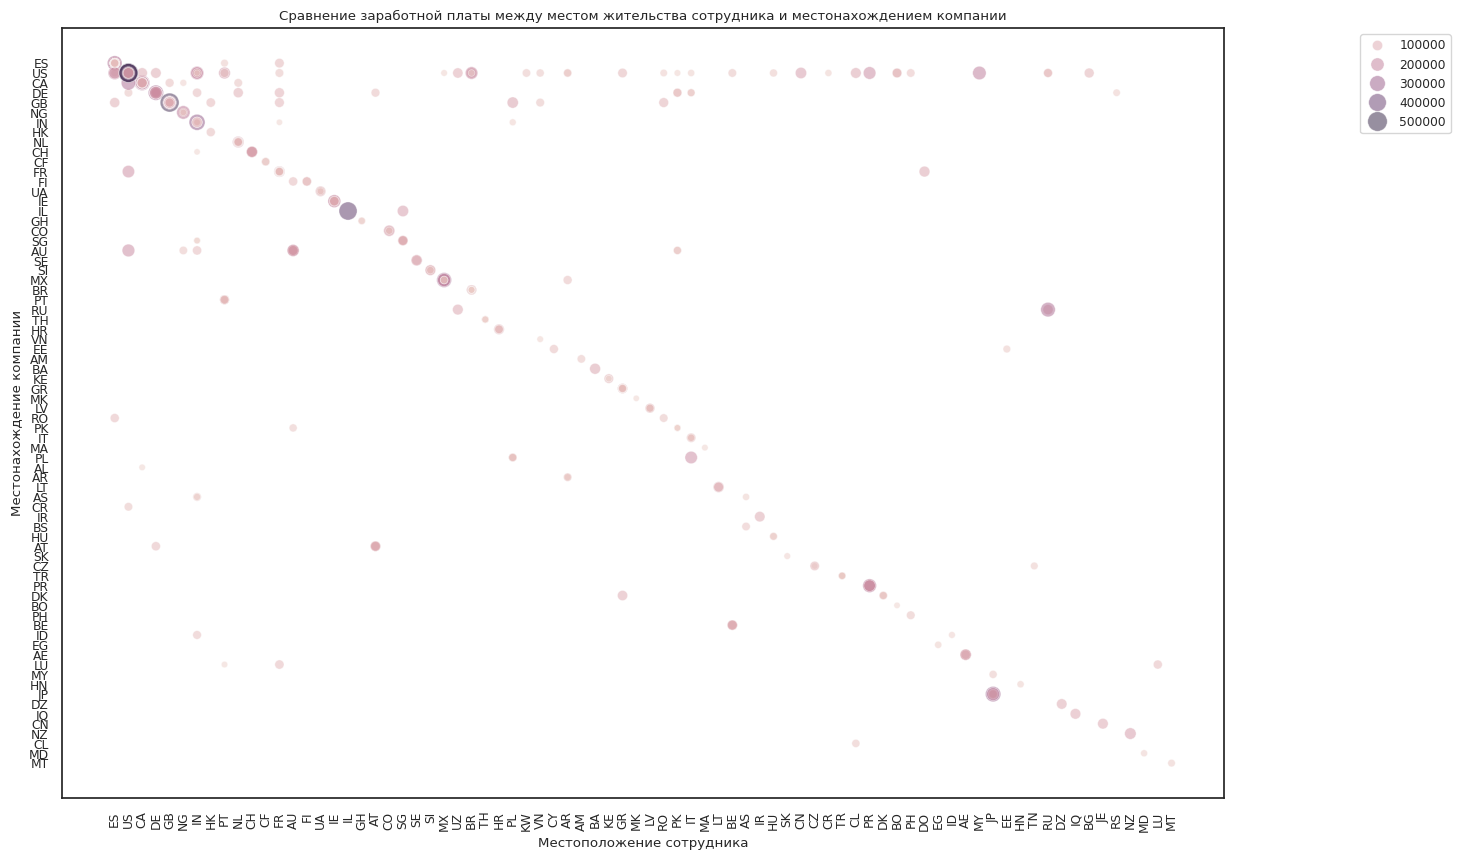

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='employee_residence', y='company_location', hue='adjusted_salary', size='adjusted_salary',\
                sizes=(20, 200), alpha=0.5)
plt.title('Сравнение заработной платы между местом жительства сотрудника и местонахождением компании')
plt.xlabel('Местоположение сотрудника')
plt.ylabel('Местонахождение компании')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Геопространственный анализ

In [ ]:
! pip install pycountry

In [ ]:
import pycountry

def country_code_to_name(country_code):
    country = pycountry.countries.get(alpha_2=country_code)
    return country.name if country else country_code

In [ ]:
df['company_location'] = df['company_location'].apply(country_code_to_name)
df['employee_residence'] = df['employee_residence'].apply(country_code_to_name)

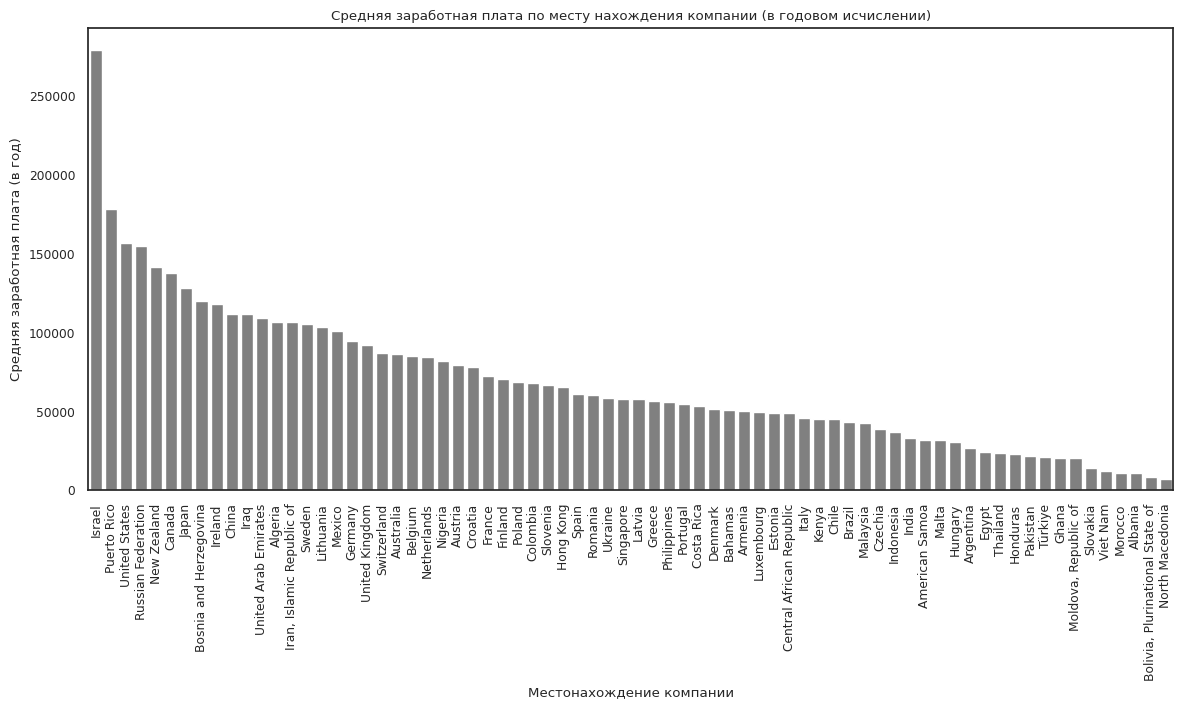

In [ ]:
import plotly.express as px
avg_salary_by_location = df.groupby('company_location', as_index=False)['adjusted_salary'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'adjusted_salary': 'Average Salary'},
                     projection='natural earth')

fig1.show()


avg_salary_by_location = df.groupby('company_location')['adjusted_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location, color='grey')
plt.title('Средняя заработная плата по месту нахождения компании (в годовом исчислении)')
plt.xlabel('Местонахождение компании')
plt.ylabel('Средняя заработная плата (в год)')
plt.xticks(rotation=90)
plt.show()

В какой стране самая высокая заработная плата

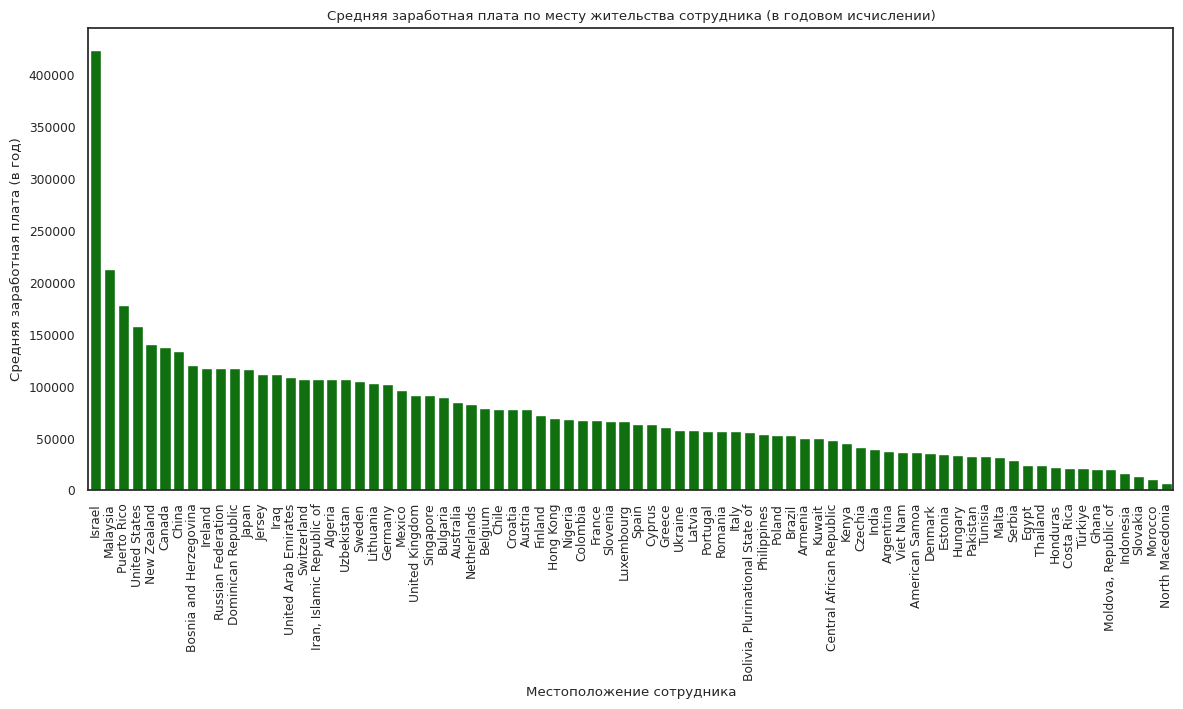

In [ ]:
avg_salary_by_residence = df.groupby('employee_residence', as_index=False)['adjusted_salary'].mean()

fig2 = px.choropleth(avg_salary_by_residence,
                     locations='employee_residence',
                     locationmode='country names',
                     color='adjusted_salary',
                     hover_name='employee_residence',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Employee Residence',
                     labels={'adjusted_salary': 'Average Adjusted Salary'},
                     projection='natural earth')

fig2.show()

avg_salary_by_residence = df.groupby('employee_residence')['adjusted_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_salary_by_residence.index, y=avg_salary_by_residence.values, color='green')
plt.title('Средняя заработная плата по месту жительства сотрудника (в годовом исчислении)')
plt.xlabel('Местоположение сотрудника')
plt.ylabel('Средняя заработная плата (в год)')
plt.xticks(rotation=90)
plt.show()

Какая страна не требует от вас работы на рабочем месте?

In [ ]:
remote_100 = df[df['remote_ratio'] == 0]

country_counts = remote_100['company_location'].value_counts().reset_index()
country_counts.columns = ['country_code', 'count']

country_counts['country_name'] = country_counts['country_code'].apply(country_code_to_name)

fig = px.choropleth(country_counts,
                    locations='country_name',
                    locationmode='country names',
                    color=np.log10(country_counts['count']),
                    hover_name='country_name',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Подробная карта полностью удаленных офисов компаний',
                    projection='natural earth')

fig.update_coloraxes(colorbar=dict(title='Count (Log Scale)', tickvals=[0, 1, 2, 3], ticktext=['1', '10', '100', '1000']))

fig.show()

Где находится компания

In [ ]:
remote_0 = df[df['remote_ratio'] == 100]

country_counts = remote_0['company_location'].value_counts().reset_index()
country_counts.columns = ['country_code', 'count']

country_counts['country_name'] = country_counts['country_code'].apply(country_code_to_name)

fig = px.choropleth(country_counts,
                    locations='country_name',
                    locationmode='country names',
                    color=np.log10(country_counts['count']),
                    hover_name='country_name',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Подробная карта расположения компании',
                    projection='natural earth')

fig.update_coloraxes(colorbar=dict(title='Count (company)', tickvals=[0, 1, 2, 3], ticktext=['1', '10', '100', '1000']))

fig.show()

Распределение скорректированных зарплат показывает, что большинство специалистов в области обработки данных зарабатывают от 100 000 до 180 500 долларов США в год. Однако есть несколько высокооплачиваемых сотрудников, которые зарабатывают значительно больше, чем в среднем.

Средняя зарплата специалистов по обработке данных, работающих в таких странах, как Израиль, США и Россия, как правило, выше, чем в других. С другой стороны, компании, расположенные в таких регионах, как Юго-Восточная Азия, Африка и Восточная Европа, платят специалистам по обработке данных сравнительно более низкую среднюю зарплату.

Анализ средней заработной платы в разбивке по месту жительства сотрудников показывает, что специалисты по обработке данных, проживающие в таких странах, как Израиль, США и Малайзия, как правило, получают более высокие средние зарплаты. И наоборот, специалисты по обработке данных, проживающие в таких странах, как Словакия, Марокко и Северная Македония, имеют более низкие средние зарплаты.

Сравнение заработной платы между местом жительства сотрудника и местонахождением компании показывает, что, хотя некоторые специалисты по обработке данных получают высокую зарплату, работая в компаниях, базирующихся в странах с высокооплачиваемыми рынками труда, другим, возможно, придется переехать или работать удаленно, чтобы воспользоваться этими возможностями.



В заключение, этот анализ заработных плат в области data science показывает влияние различных факторов, таких как местоположение компании и место жительства сотрудников, на динамику заработной платы. Понимая эти закономерности, соискатели и работодатели могут принимать обоснованные решения о возможностях трудоустройства, компенсационных пакетах и стратегиях привлечения талантов.

### 3. Корреляционный анализ данных:
- Используя бинарное кодирование,  закодируйте категориальные признаки и стандартизируйте численные признаки
- Используя корреляционный анализ определите наиболее важные признаки

###Стандартизация численных признаков и кодировка категориальные признаки

In [ ]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['adjusted_salary']

In [ ]:
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df[numerical_columns])

scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary','salary_in_usd'], axis=1)

In [ ]:
processed_df_copy = processed_df.drop(processed_df.select_dtypes(include = 'object'), axis = 1)

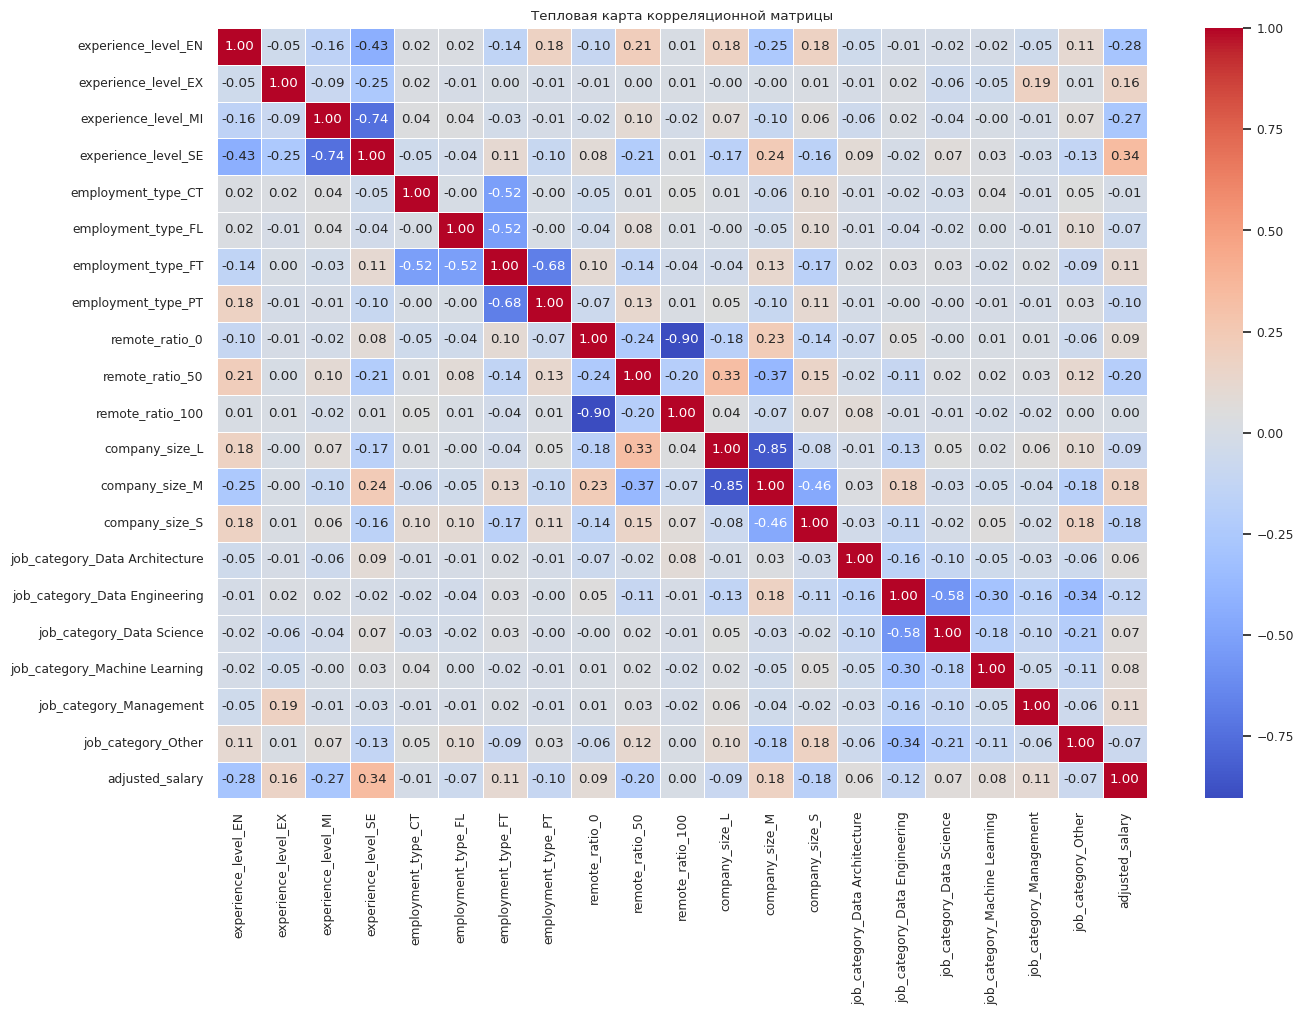

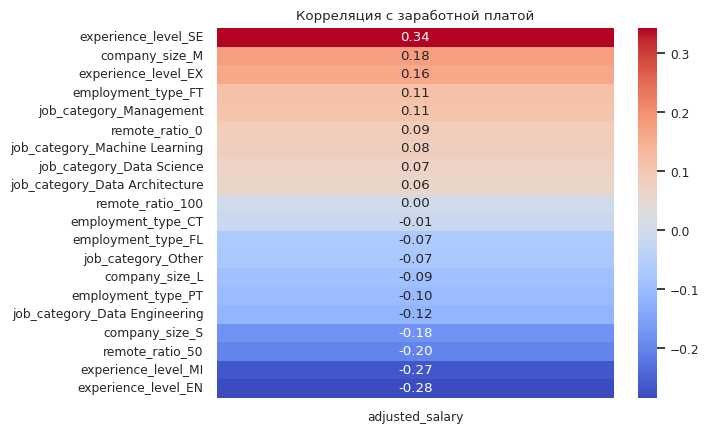

In [ ]:
correlation_matrix = processed_df_copy.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = processed_df_copy.corr()
target_corr = corr['adjusted_salary'].drop('adjusted_salary')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с заработной платой')
plt.show()


Положительные значения корреляции (красный цвет) показывают, что между параметром и заработной платой существует прямая связь: выше значение параметра, выше зарплата. Отрицательные значения корреляции (синий цвет) говорят о том, что между параметром и зарплатой обратная связь: выше значение параметра, ниже зарплата.

Наиболее значимые положительные корреляции:
1. experience_level_SE (0.34) - предположительно, уровень опыта Senior Engineer имеет сильную положительную корреляцию с заработной платой.
2. company_size_M (0.18) - размер компании средний (Medium) имеет умеренную положительную корреляцию с зарплатой.
3. experience_level_EX (0.16) - очень высокий уровень опыта (Expert) также имеет положительную корреляцию с зарплатой.

Наиболее значимые отрицательные корреляции:
1. experience_level_EN (-0.28) - начальный уровень опыта (Entry-level Engineer) имеет сильную отрицательную корреляцию с заработной платой.
2. experience_level_MI (-0.27) - средний уровень опыта (Mid-level Engineer) имеет также отрицательную корреляцию с заработной платой.
3. remote_ratio_50 (-0.20) и company_size_S (-0.18) - работа на 50% удаленно и небольшой размер компании имеют умеренно отрицательную корреляцию с зарплатой.

Другие параметры также имеют разные уровни корреляции с заработной платой, но их значения меньше по абсолютной величине, что указывает на менее сильную связь с зарплатой.


### 4. Построение модели линейной регрессии
- Разделите датасет на обучающую и тестовую выборки. Постройте модель линейной регрессии, используя обучающий набор данных. При построении модели используйте как минимум три различных признака из доступных в датасете, которые, по вашему мнению, наиболее важны для предсказания зарплаты.
- Оцените качество модели на основе тестовых данных, используя соответствующие метрики (например, среднеквадратическая ошибка (MSE), коэффициент детерминации
). Проанализируйте, какие признаки оказали наибольшее влияние на прогнозируемую зарплату.

###Разделение на обучающую и тестовую выборки


In [ ]:
X = processed_df_copy.drop(["adjusted_salary"], axis=1)
y = processed_df_copy["adjusted_salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

MSE: 0.7564822330058492,
MAE :0.6636938928580131,
 R2: 0.24639724613437008


In [ ]:
y_test_pred = lr.predict(X_test)
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

MSE: 0.7757148894644955,
MAE :0.6903550389771388,
 R2: 0.2110812326275051


Результаты на обучающей выборке:
   - MSE -- 0.7564822330058492
   - MAE -- 0.6636938928580131
   - R2 -- 0.24639724613437008

   Эти значения указывают на качество модели на обучающих данных. R2 близок к 0.25, что свидетельствует о низкой объясняющей способности модели.

4. В следующем блоке кода не видно, здесь уже идёт работа с тестовой выборкой:
   - Делается предсказание (`y_test_pred`) для тестовой выборки.
   - Выводятся метрики ошибок: MSE, MAE и R2 для тестового набора данных.

5. Результаты на тестовой выборке:
   - MSE -- 0.7757148894649355
   - MAE -- 0.6903550389717388
   - R2 -- 0.2110812326725051

   Эти результаты несколько хуже, чем на обучающем наборе: коэффициент детерминации немного ниже (около 0.21), что означает, что модель несколько хуже объясняет вариативность тестовой выборки по сравнению с обучающей выборкой.

В целом, результаты указывают на то, что модель линейной регрессии не обеспечивает высокого качества прогнозирования для представленных данных, так как R2 довольно низкий как на обучающих, так и на тестовых данных. Это может говорить о том, что между предикторами и целевой переменной имеются нелинейные зависимости, или в данных недостаточно информации для обучения модели, или, возможно, потребуются более сложные модели для предсказания.

Прямое кодирование (One-Hot Encoding) является одним из наиболее универсальных и распространенных методов обработки категориальных данных в машинном обучении. Он позволяет преобразовать категориальные переменные в формат, который можно легко использовать в численных моделях, создавая отдельный столбец для каждой категории и присваивая 1 или 0 в зависимости от наличия данной категории в записи.

### Обоснование использования прямого кодирования:

1. Интерпретируемость: Преобразованные данные легко интерпретируются и понятны. Каждая категория представлена отдельным столбцом, что делает модель более прозрачной и понятной для анализа.

2. Избегание порядковой зависимости: В отличие от кодирования меток, прямое кодирование не вводит искусственную числовую последовательность между категориями, тем самым избегая возможного искажения данных.

3. Широкая поддержка: Большинство библиотек машинного обучения легко работает с данными, обработанными методом прямого кодирования, что делает его отличным выбором для начального этапа разработки модели.

### Потенциал для улучшения модели через очистку данных:

Даже если на начальных этапах разработки используется только прямое кодирование, качество модели можно значительно улучшить на последующих этапах за счет более тщательной предварительной обработки и очистки данных. Например, удаление выбросов, обработка пропущенных значений и анализ корреляций может помочь улучшить распределение данных и, как следствие, повысить точность модели. Кроме того, может быть полезно переоценить категориальные переменные, чтобы определить, сохранились ли все категории важными и релевантными для задачи моделирования или некоторые из них можно объединить.